In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Clean_Dataset.csv")

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df = df.drop('Unnamed: 0', axis=1)


In [7]:
df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
df.shape

(300153, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [12]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Data Visualization

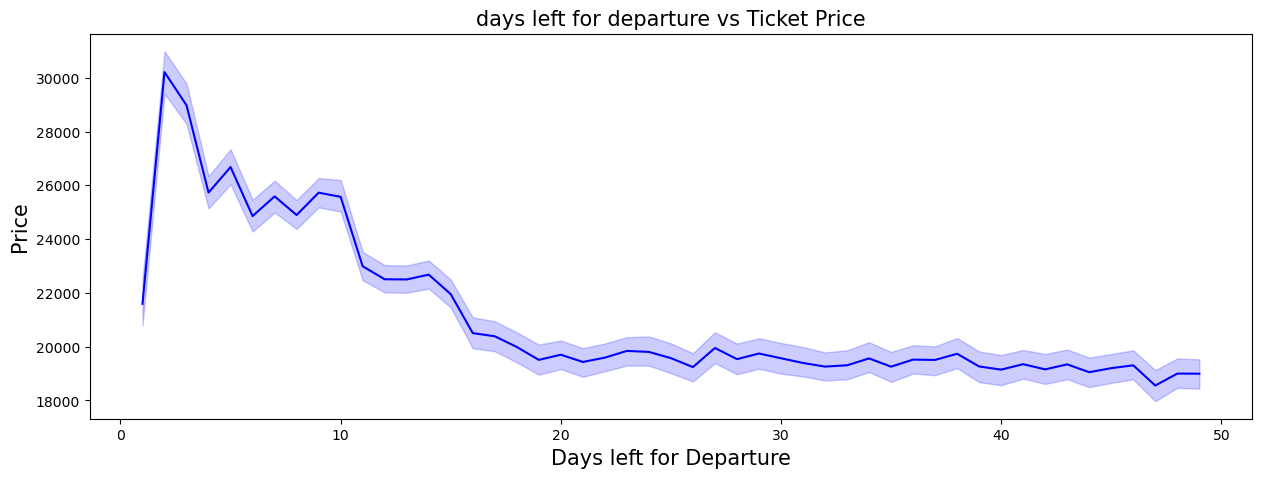

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('days left for departure vs Ticket Price',fontsize=15)
plt.xlabel('Days left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

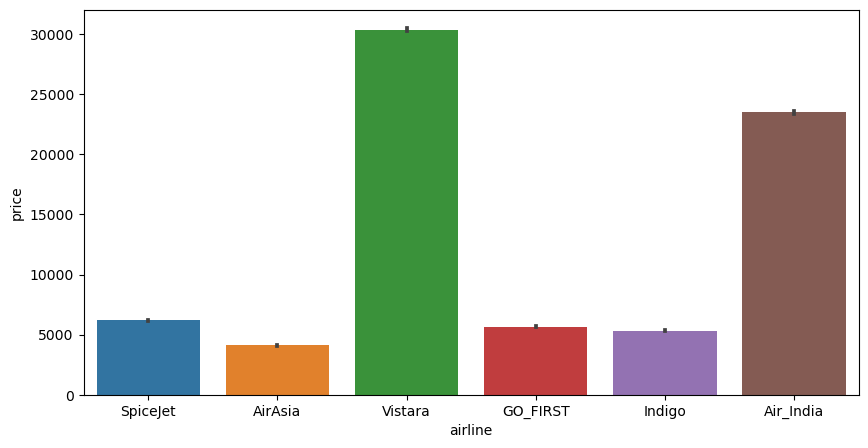

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price',data=df)

<Axes: xlabel='class', ylabel='price'>

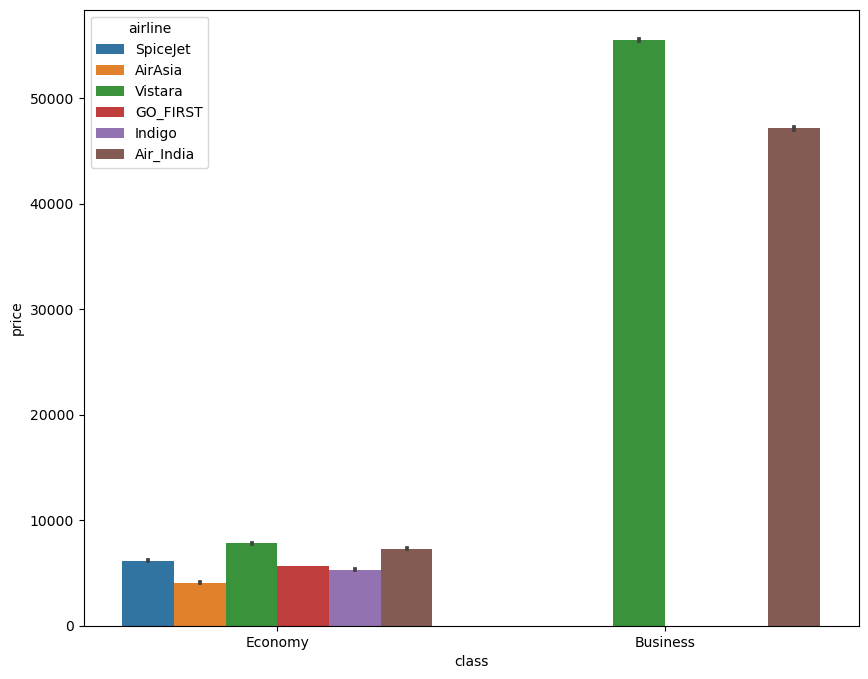

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='class',y='price',data=df,hue='airline')

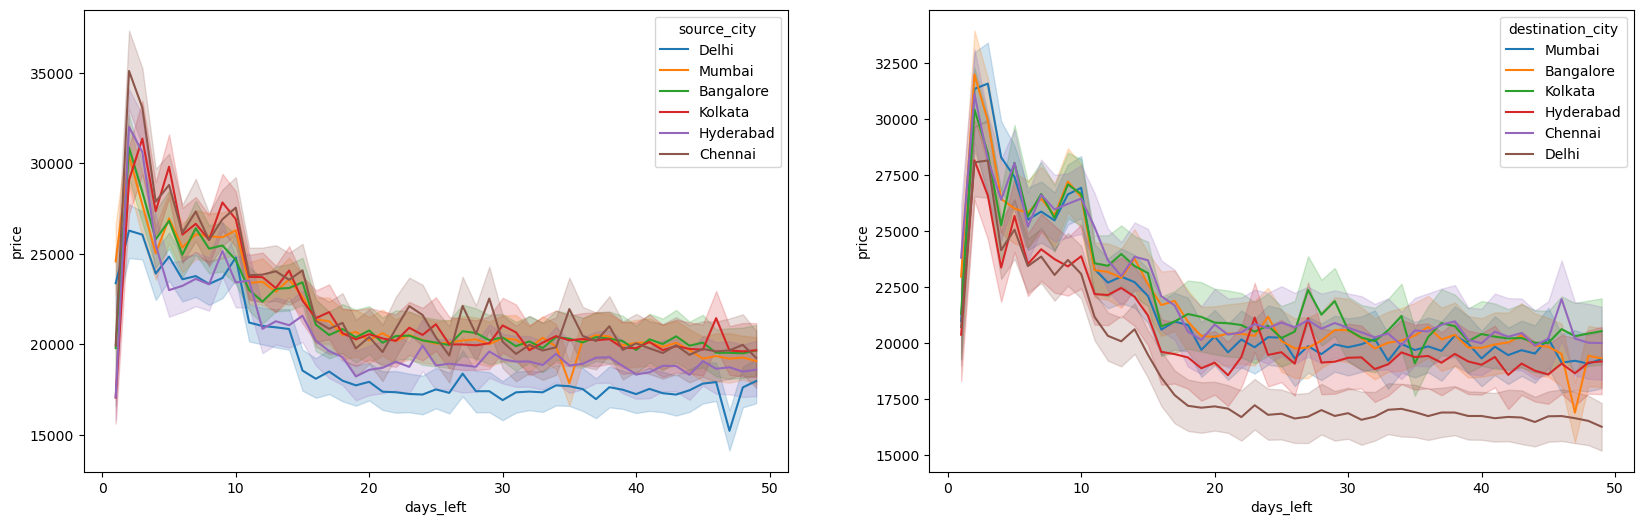

In [17]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

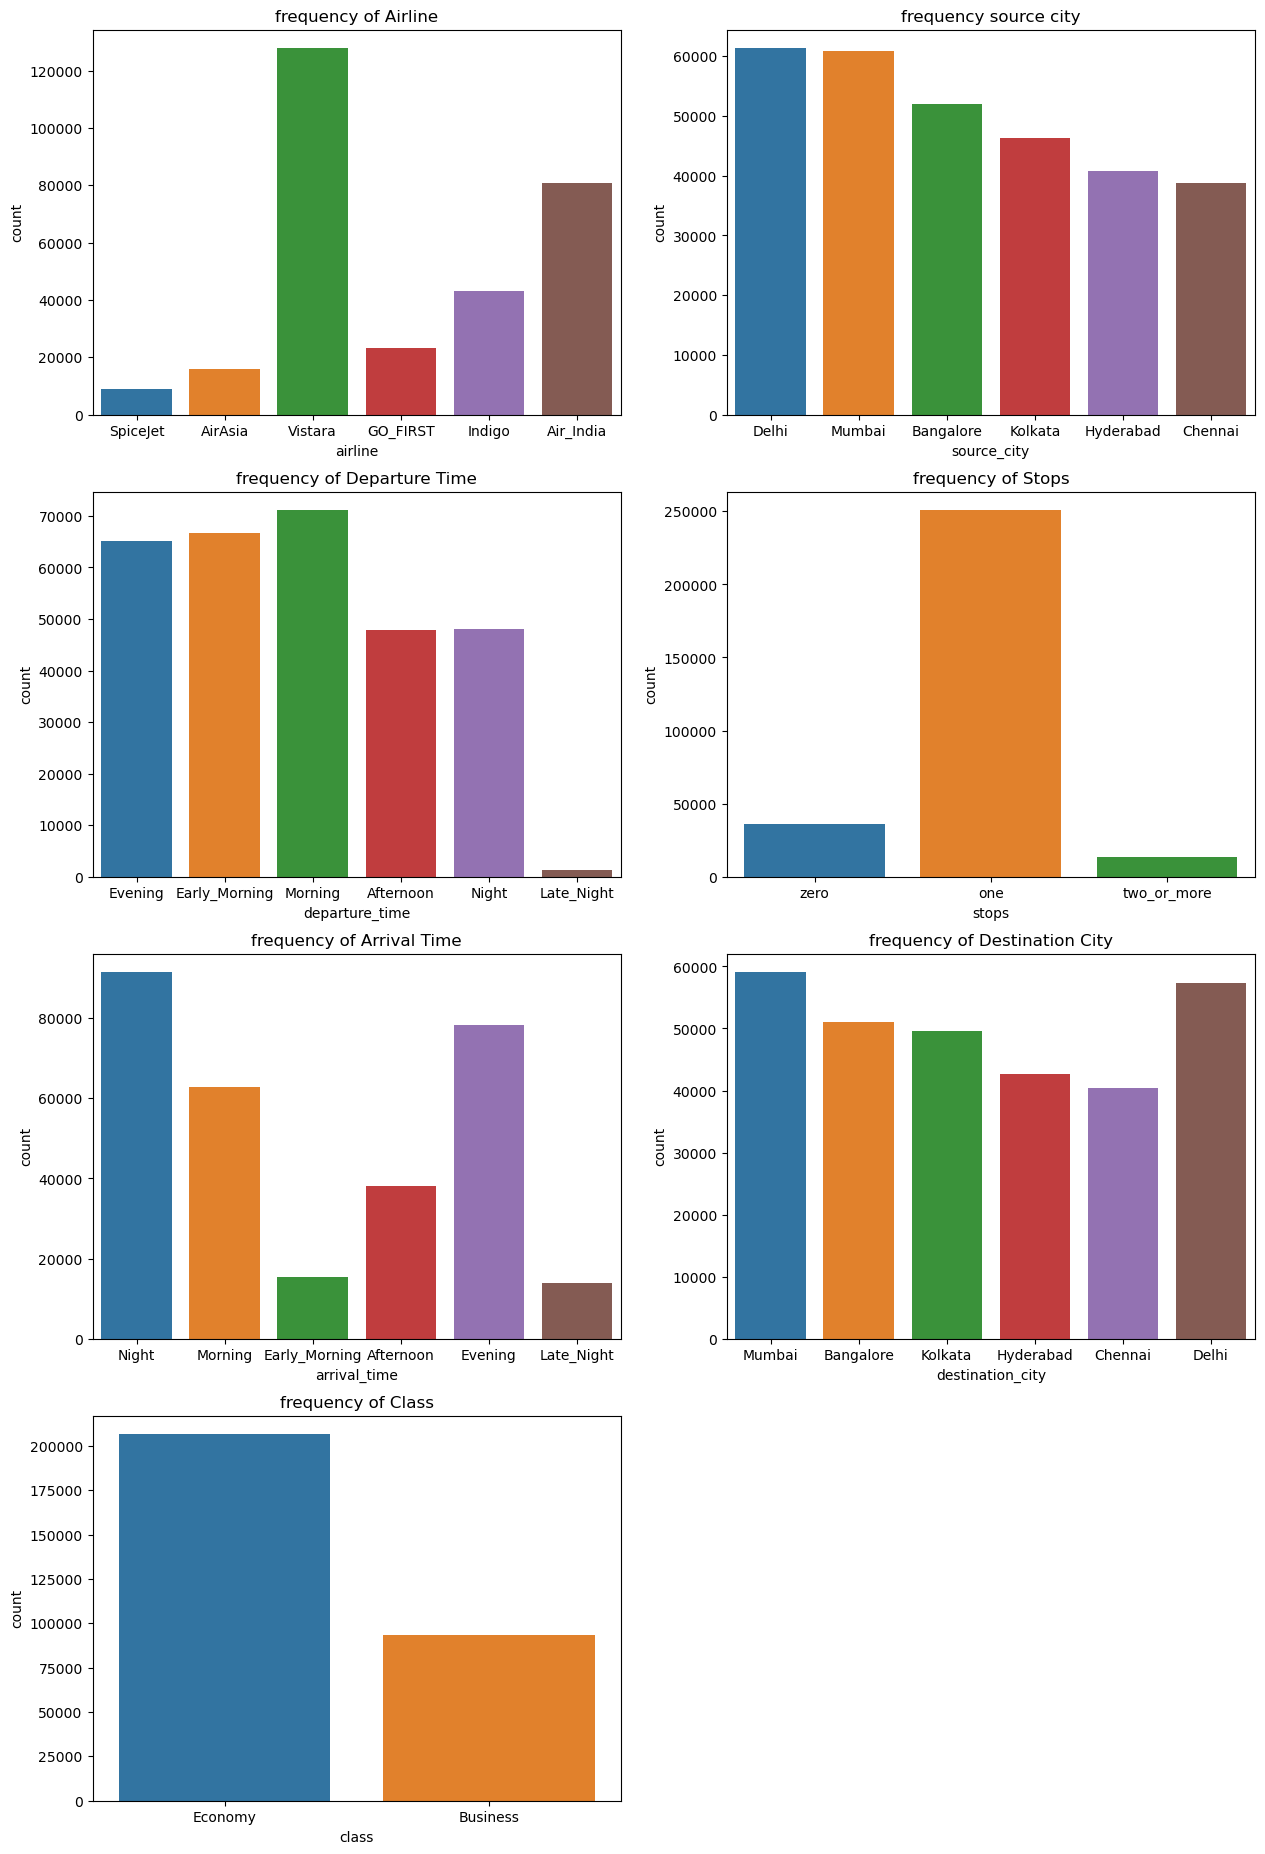

In [18]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
plt.title('frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df)
plt.title('frequency source city')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'],data=df)
plt.title('frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'],data=df)
plt.title('frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title('frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df)
plt.title('frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x=df['class'],data=df)
plt.title('frequency of Class')

plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


In [29]:
df['flight']=le.fit_transform(df['flight'])

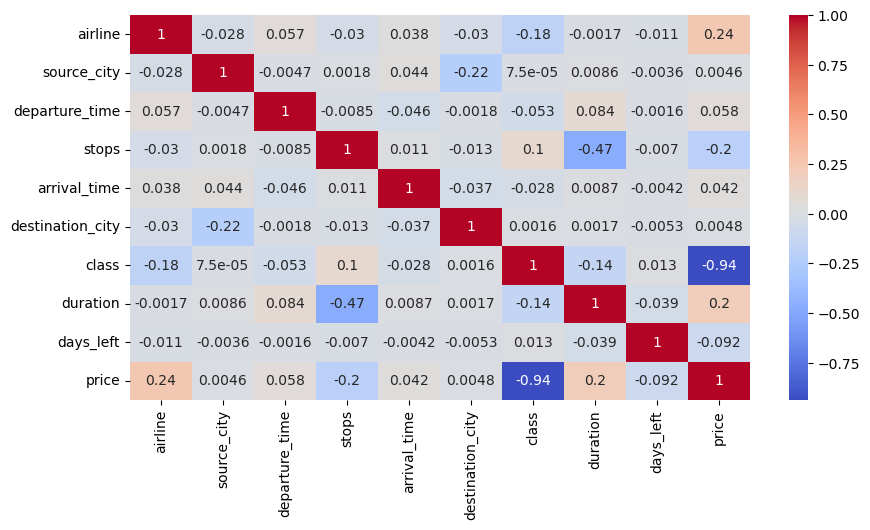

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

# Feature Selection

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [28]:
df


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,UK-822,1,4,0,2,3,0,10.08,49,69265
300149,5,UK-826,1,0,0,5,3,0,10.42,49,77105
300150,5,UK-832,1,1,0,5,3,0,13.83,49,79099
300151,5,UK-828,1,1,0,2,3,0,10.00,49,81585


In [31]:
x=df.drop(columns=['price'])
y=df['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_Value','Predicted_value'])
difference

,Actual_Value,Predicted_value
0,7366.0,4566.731720
1,64831.0,52844.548928
2,6195.0,7905.477525
3,60160.0,56121.030902
4,6578.0,6672.929166
...,...,...
60026,5026.0,5824.270542
60027,3001.0,368.150162
60028,6734.0,5843.727435
60029,5082.0,-1712.576799


# Linear Regression

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error


4622.130282329214

In [36]:
from sklearn.metrics import *
mean_absolute_percentage_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mse

49189755.071329765

In [37]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

7013.540836933208

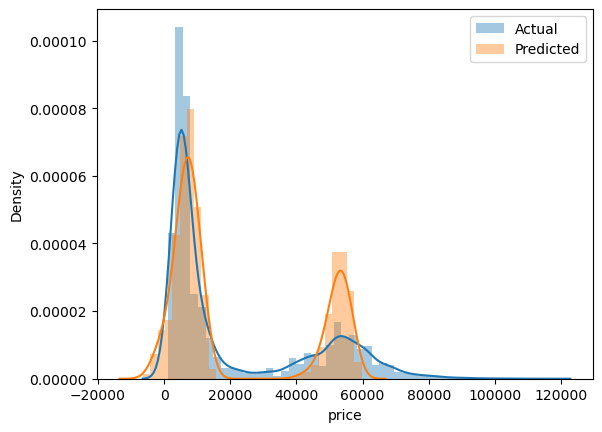

In [38]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()


# Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2=r2_score(y_test,y_pred)
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

894.3770329774062

In [43]:
r2

0.9826547289896157

In [46]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
mse

8941179.736101162

In [47]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

2990.180552425081

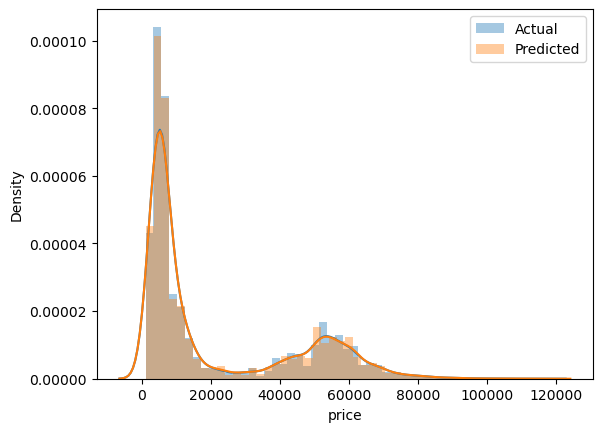

In [48]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()


# Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

0.9826547289896157


894.3770329774062

In [50]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
mse

8941179.736101162

In [51]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

2990.180552425081

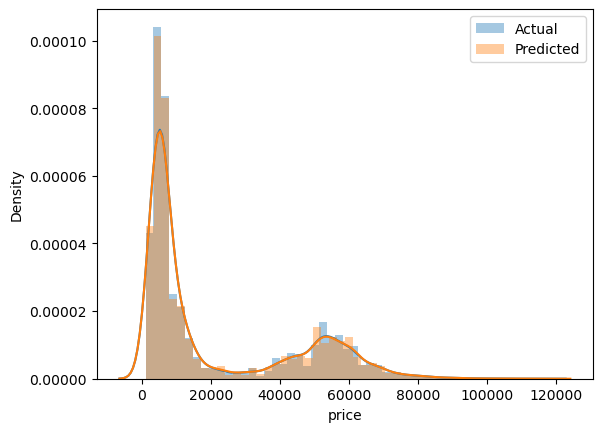

In [52]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
